# K Nearest Neighbors
An example of how to classify data points using K Nearest Neighbors

The data from the Institute of Agrophysics of the Polish Academy of Sciences in Lublin consists of three different varieties of wheat: Kama, Rosa and Canadian. There are 70 elements of each, randomly selected for an experiment.

The data includes:
* Area (A) - area of the seed
* Perimeter (P) - perimeter of the seed
* Compactness = 4*pi*A/P2
* Kernel_length - Length of the seed
* Kernel_width - Width of the seed
* Asymmetry_coef - The coefficient of asymmetry for the seed
* Groove_length - the length of the groove down the middle of the seed
* Seed - the class of seed (Kama, Rosa, or Canadian)

## 1. Library Imports and Data Loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("data/seeds.csv")

## 2. Understanding the Data

In [8]:
# df.info()
# df.head()
df["seed"].value_counts()

seed
Kama        70
Rosa        70
Canadian    70
Name: count, dtype: int64

## 3. Feature Selection

### 3.1. Forward Selection

In [41]:
selected_features = []
y_feature = "seed"

# Save previous score
prev_score = 0

while len(selected_features) < len(df.columns) - 1:
    # Cretae variables for storing best score/feature
    best_feature = ""
    best_score = 0

    # Loop over each feature available
    available_features = [i for i in df.columns if not i in selected_features and i != y_feature]
    for feature in available_features:
        # Extract Data
        x_vars = selected_features.copy()
        x_vars.append(feature)
        X_temp = df[x_vars]
        y_temp = df[y_feature]

        # Split into training and testing data sets
        X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y_temp, test_size=0.2, random_state=5)

        # Create the model
        model_temp = KNeighborsClassifier()

        # Train the model
        model_temp = model_temp.fit(X_train_temp, y_train_temp)

        # Calculate Accuracy
        score_temp = model_temp.score(X_test_temp, y_test_temp)

        # Save feature if it is the new best
        if score_temp > best_score:
            best_score = score_temp
            best_feature = feature
    
    # Check if best feature is substantial improvement
    if (best_score > (prev_score + 0.05)):
        # Append new feature
        selected_features.append(best_feature)
        print("Added Feature", feature, "| Previous Score:",round(prev_score, 2), "| New Score:", round(best_score, 2))

        # Update previous score
        prev_score = best_score
    else:
        break
print("Selected Features:", selected_features)
        



Added Feature groove_length | Previous Score: 0 | New Score: 0.83
Added Feature groove_length | Previous Score: 0.83 | New Score: 0.95
Selected Features: ['perimeter', 'asymmetry_coef']


1. By changing the value of K, you change the quantity of points the model will use around the given value to classify the item. This change in points used often causes the model to have different scores with the same features. This will cuase the forward selection process to select different features.

2. I would choose a model with perimeter and asymmetry_coef. This is because when running forward selection, I added a check to make sure that the added values would not reduce the score and would increase it substantially. This is to prevent overfitting.

## 4. Building our Model

In [4]:
df.columns

Index(['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width',
       'asymmetry_coef', 'groove_length', 'seed'],
      dtype='object')

In [9]:
# Extract Data
X = df[['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width',
       'asymmetry_coef', 'groove_length']]
y=df["seed"]

# Split into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Create the model
model = KNeighborsClassifier()

# Train the model
model = model.fit(X_train, y_train)

## 5. Evaluation

In [10]:
# Make predictions
y_pred = model.predict(X_test)

y_pred

array(['Kama', 'Kama', 'Rosa', 'Rosa', 'Kama', 'Canadian', 'Rosa', 'Kama',
       'Kama', 'Canadian', 'Canadian', 'Kama', 'Kama', 'Rosa', 'Rosa',
       'Kama', 'Canadian', 'Canadian', 'Rosa', 'Rosa', 'Rosa', 'Canadian',
       'Canadian', 'Canadian', 'Rosa', 'Kama', 'Canadian', 'Rosa',
       'Canadian', 'Kama', 'Kama', 'Canadian', 'Canadian', 'Canadian',
       'Rosa', 'Kama', 'Canadian', 'Canadian', 'Rosa', 'Canadian', 'Kama',
       'Rosa'], dtype=object)

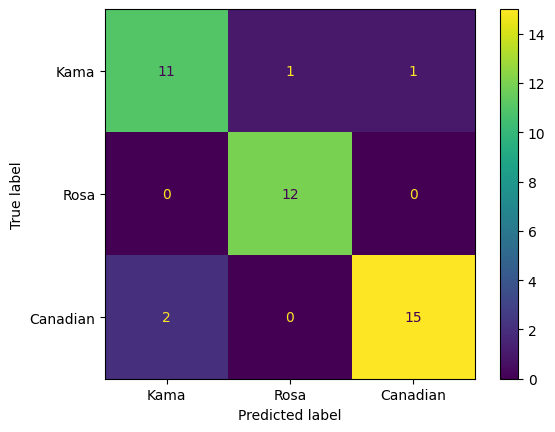

In [17]:
# Create a confusion matrix
labels = df["seed"].unique()
conf_mat = confusion_matrix(y_test, y_pred, labels=labels)

disp = ConfusionMatrixDisplay(conf_mat, display_labels=labels)
disp.plot()

In [18]:
# Calculate Accuracy
model.score(X_test, y_test)

0.9047619047619048